# Request
How did the excess probability of death for males and females change from 2019 to 2020 across different age groups?
Show code.

In [1]:
import pandas as pd

# Load the CSV file
file_path = 'Covid_analysis.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)

# Filter the data for the years 2019 and 2020
df_filtered = df[df['Year'].isin([2019, 2020])]

# Group by Age and Year to observe changes in excess probability of death
df_grouped = df_filtered.groupby(['Age', 'Year']).agg({
    'excess_male_prob': 'mean',
    'excess_female_prob': 'mean'
}).reset_index()

df_grouped_pivot = df_grouped.pivot(index='Age', columns='Year', values=['excess_male_prob', 'excess_female_prob'])

# Calculate the change in excess probability of death from 2019 to 2020
df_grouped_pivot['change_male'] = df_grouped_pivot[('excess_male_prob', 2020)] - df_grouped_pivot[('excess_male_prob', 2019)]
df_grouped_pivot['change_female'] = df_grouped_pivot[('excess_female_prob', 2020)] - df_grouped_pivot[('excess_female_prob', 2019)]

# Reset the index for easier viewing
df_result = df_grouped_pivot[['change_male', 'change_female']].reset_index()

# Display the result
print(df_result)

     Age change_male change_female
Year                              
0      0    -0.00033      -0.00020
1      1    -0.00001      -0.00004
2      2     0.00000      -0.00001
3      3     0.00002       0.00000
4      4     0.00000      -0.00001
..    ..         ...           ...
85    85     0.01849       0.01397
86    86     0.01919       0.01469
87    87     0.01856       0.01304
88    88     0.02380       0.01768
89    89     0.01708       0.01559

[90 rows x 3 columns]


# Request
Use heatmaps to visualize the changes in excess death probabilities by age group between 2019 and 2020. Show code.

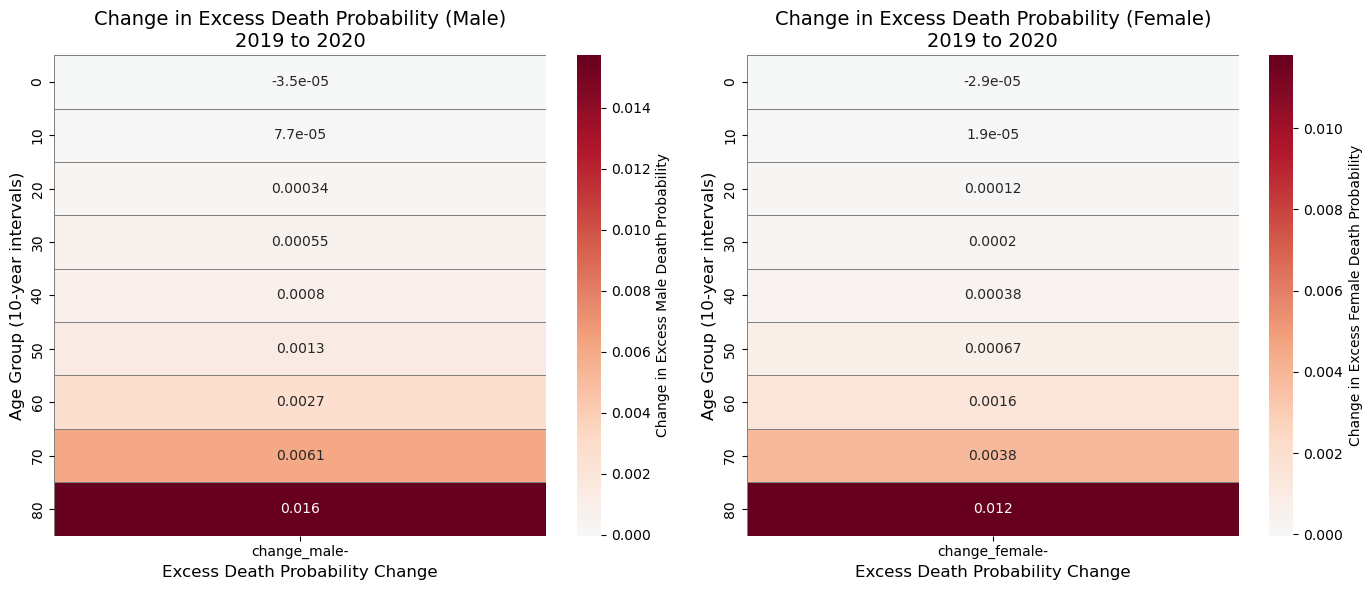

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'Covid_analysis.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)

# Grouping the data by every 10 years
df['Age_Group'] = (df['Age'] // 10) * 10

# Filter the data for the years 2019 and 2020
df_filtered = df[df['Year'].isin([2019, 2020])]

# Group by Age_Group and Year to observe changes in excess probability of death
df_grouped = df_filtered.groupby(['Age_Group', 'Year']).agg({
    'excess_male_prob': 'mean',
    'excess_female_prob': 'mean'
}).reset_index()

df_grouped_pivot = df_grouped.pivot(index='Age_Group', columns='Year', values=['excess_male_prob', 'excess_female_prob'])

# Calculate the change in excess probability of death from 2019 to 2020
df_grouped_pivot['change_male'] = df_grouped_pivot[('excess_male_prob', 2020)] - df_grouped_pivot[('excess_male_prob', 2019)]
df_grouped_pivot['change_female'] = df_grouped_pivot[('excess_female_prob', 2020)] - df_grouped_pivot[('excess_female_prob', 2019)]

# Reset the index for easier viewing
df_result = df_grouped_pivot[['change_male', 'change_female']].reset_index()

# Prepare the data for heatmap visualization
df_heatmap = df_result.set_index('Age_Group')

# Improved heatmap with clearer labels and formatting
plt.figure(figsize=(14, 6))

# Heatmap for male changes
plt.subplot(1, 2, 1)
sns.heatmap(df_heatmap[['change_male']], annot=True, cmap='RdBu_r', center=0, linewidths=.5, linecolor='gray', 
            cbar_kws={'label': 'Change in Excess Male Death Probability'})
plt.title('Change in Excess Death Probability (Male)\n2019 to 2020', fontsize=14)
plt.xlabel('Excess Death Probability Change', fontsize=12)
plt.ylabel('Age Group (10-year intervals)', fontsize=12)

# Heatmap for female changes
plt.subplot(1, 2, 2)
sns.heatmap(df_heatmap[['change_female']], annot=True, cmap='RdBu_r', center=0, linewidths=.5, linecolor='gray', 
            cbar_kws={'label': 'Change in Excess Female Death Probability'})
plt.title('Change in Excess Death Probability (Female)\n2019 to 2020', fontsize=14)
plt.xlabel('Excess Death Probability Change', fontsize=12)
plt.ylabel('Age Group (10-year intervals)', fontsize=12)

plt.tight_layout()
plt.show()

# Request
What was the population distribution and excess death probabilities by age group in 2020? Show code.

In [3]:
import pandas as pd

# Load the CSV file
file_path = 'Covid_analysis.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)

# Grouping the data by every 10 years
df['Age_Group'] = (df['Age'] // 10) * 10

# Filter the data for the year 2020
df_2020 = df[df['Year'] == 2020]

# Group by Age_Group to calculate population distribution and excess death probabilities
df_2020_grouped = df_2020.groupby('Age_Group').agg({
    'Total': 'sum',  # Sum of total population in each age group
    'excess_male_prob': 'mean',  # Mean excess death probability for males
    'excess_female_prob': 'mean'  # Mean excess death probability for females
}).reset_index()

# Normalize the population distribution to get percentage
df_2020_grouped['population_percentage'] = (df_2020_grouped['Total'] / df_2020_grouped['Total'].sum()) * 100

# Display the results
print(df_2020_grouped[['Age_Group', 'population_percentage', 'excess_male_prob', 'excess_female_prob']])

   Age_Group  population_percentage  excess_male_prob  excess_female_prob
0          0              12.129860         -0.000061           -0.000047
1         10              12.999506          0.000071            0.000012
2         20              13.663990          0.000321            0.000116
3         30              13.645218          0.000617            0.000234
4         40              12.418632          0.000865            0.000350
5         50              13.008155          0.001147            0.000527
6         60              11.770253          0.002627            0.001452
7         70               7.321779          0.005448            0.003311
8         80               3.042607          0.013504            0.010049


# Request
Use population pyramids to compare the population distribution against excess death probabilities by age group for males and females in 2020. Show code.

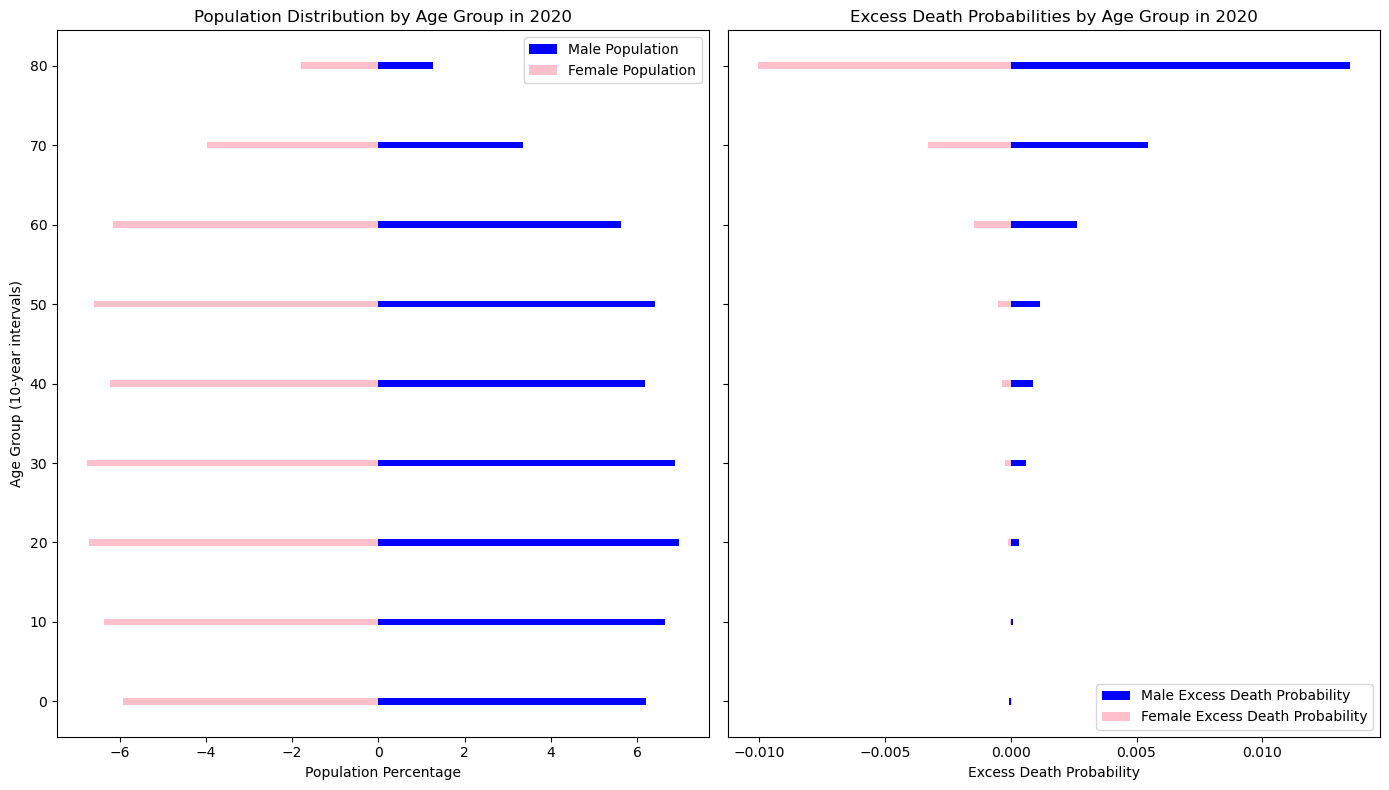

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = 'Covid_analysis.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)

# Grouping the data by every 10 years
df['Age_Group'] = (df['Age'] // 10) * 10

# Filter the data for the year 2020
df_2020 = df[df['Year'] == 2020]

# Group by Age_Group to calculate population distribution and excess death probabilities
df_2020_grouped = df_2020.groupby('Age_Group').agg({
    'Female': 'sum',
    'Male': 'sum',
    'Total': 'sum',  # Sum of total population in each age group
    'excess_male_prob': 'mean',  # Mean excess death probability for males
    'excess_female_prob': 'mean'  # Mean excess death probability for females
}).reset_index()

# Calculate male and female population distribution
df_2020_grouped['male_population_percentage'] = (df_2020_grouped['Male'] / df_2020_grouped['Total'].sum()) * 100
df_2020_grouped['female_population_percentage'] = (df_2020_grouped['Female'] / df_2020_grouped['Total'].sum()) * 100

# Prepare the data for the population pyramid
age_groups = df_2020_grouped['Age_Group']
male_population = df_2020_grouped['male_population_percentage']
female_population = df_2020_grouped['female_population_percentage']

# Excess death probabilities
male_excess_prob = df_2020_grouped['excess_male_prob']
female_excess_prob = df_2020_grouped['excess_female_prob']

# Plotting the population pyramid with excess death probabilities
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

# Plot the population distribution
ax[0].barh(age_groups, male_population, color='blue', label='Male Population')
ax[0].barh(age_groups, -female_population, color='pink', label='Female Population')
ax[0].set_xlabel('Population Percentage')
ax[0].set_ylabel('Age Group (10-year intervals)')
ax[0].set_title('Population Distribution by Age Group in 2020')
ax[0].legend()

# Plot the excess death probabilities
ax[1].barh(age_groups, male_excess_prob, color='blue', label='Male Excess Death Probability')
ax[1].barh(age_groups, -female_excess_prob, color='pink', label='Female Excess Death Probability')
ax[1].set_xlabel('Excess Death Probability')
ax[1].set_title('Excess Death Probabilities by Age Group in 2020')
ax[1].legend()

# Adjust the layout
plt.tight_layout()
plt.show()

# Request
How did the base probability of death change from 2015 to 2019 across different age groups for males and females? Show code.

In [5]:
import pandas as pd

# Load the CSV file
file_path = 'Covid_analysis.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)

# Grouping the data by every 10 years
df['Age_Group'] = (df['Age'] // 10) * 10

# Filter the data for the years 2015 to 2019
df_base_prob = df[df['Year'].isin([2015, 2016, 2017, 2018, 2019])]

# Group by Age_Group and Year to calculate mean base probability of death for males and females
df_base_grouped = df_base_prob.groupby(['Age_Group', 'Year']).agg({
    'base_male': 'mean',
    'base_female': 'mean'
}).reset_index()

# Pivot the data to get the base probabilities for each year
df_base_pivot = df_base_grouped.pivot(index='Age_Group', columns='Year', values=['base_male', 'base_female'])

# Calculate the change in base probability of death from 2015 to 2019
df_base_pivot['change_base_male'] = df_base_pivot[('base_male', 2019)] - df_base_pivot[('base_male', 2015)]
df_base_pivot['change_base_female'] = df_base_pivot[('base_female', 2019)] - df_base_pivot[('base_female', 2015)]

# Display the changes in base probability of death
df_result_base = df_base_pivot[['change_base_male', 'change_base_female']].reset_index()

print(df_result_base)

     Age_Group change_base_male change_base_female
Year                                              
0            0              0.0                0.0
1           10              0.0                0.0
2           20              0.0                0.0
3           30              0.0                0.0
4           40              0.0                0.0
5           50              0.0                0.0
6           60              0.0                0.0
7           70              0.0                0.0
8           80              0.0                0.0


Is all the changes zero?

Yes, all the changes in the base probability of death for both males and females across different age groups from 2015 to 2019 are zero. This indicates that the base probabilities remained constant over this period in the dataset

# Request
Use heatmaps to visualize the base probability of death over time for different age groups. Show code.

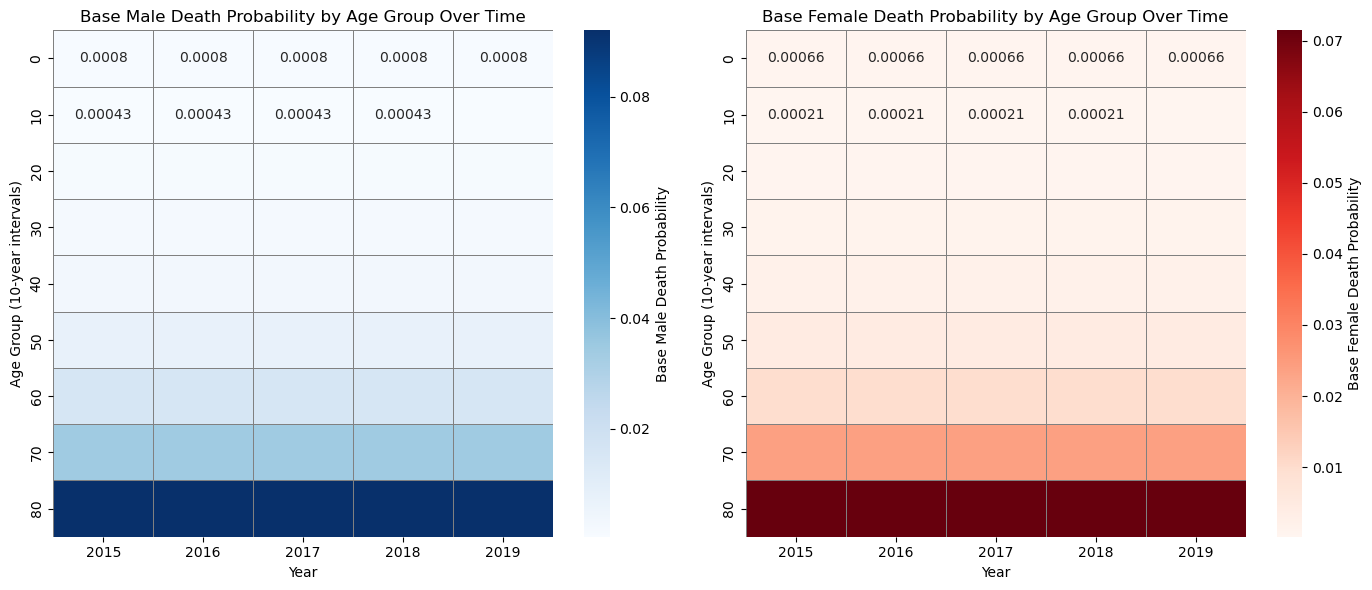

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data to get the base probabilities for heatmap visualization
df_base_male = df_base_grouped.pivot(index='Age_Group', columns='Year', values='base_male')
df_base_female = df_base_grouped.pivot(index='Age_Group', columns='Year', values='base_female')

# Ensure that all age groups (even those without data) are included
all_age_groups = range(0, df['Age'].max() + 1, 10)  # Age groups from 0 to max age in 10-year intervals
df_base_male = df_base_male.reindex(all_age_groups)
df_base_female = df_base_female.reindex(all_age_groups)

# Plotting the heatmaps
plt.figure(figsize=(14, 6))

# Heatmap for male base probabilities
plt.subplot(1, 2, 1)
sns.heatmap(df_base_male, annot=True, cmap='Blues', linewidths=.5, linecolor='gray', cbar_kws={'label': 'Base Male Death Probability'})
plt.title('Base Male Death Probability by Age Group Over Time')
plt.xlabel('Year')
plt.ylabel('Age Group (10-year intervals)')

# Heatmap for female base probabilities
plt.subplot(1, 2, 2)
sns.heatmap(df_base_female, annot=True, cmap='Reds', linewidths=.5, linecolor='gray', cbar_kws={'label': 'Base Female Death Probability'})
plt.title('Base Female Death Probability by Age Group Over Time')
plt.xlabel('Year')
plt.ylabel('Age Group (10-year intervals)')

plt.tight_layout()
plt.show()

# Request
What is the correlation between age, base probability of death, and excess probability of death? Show code.

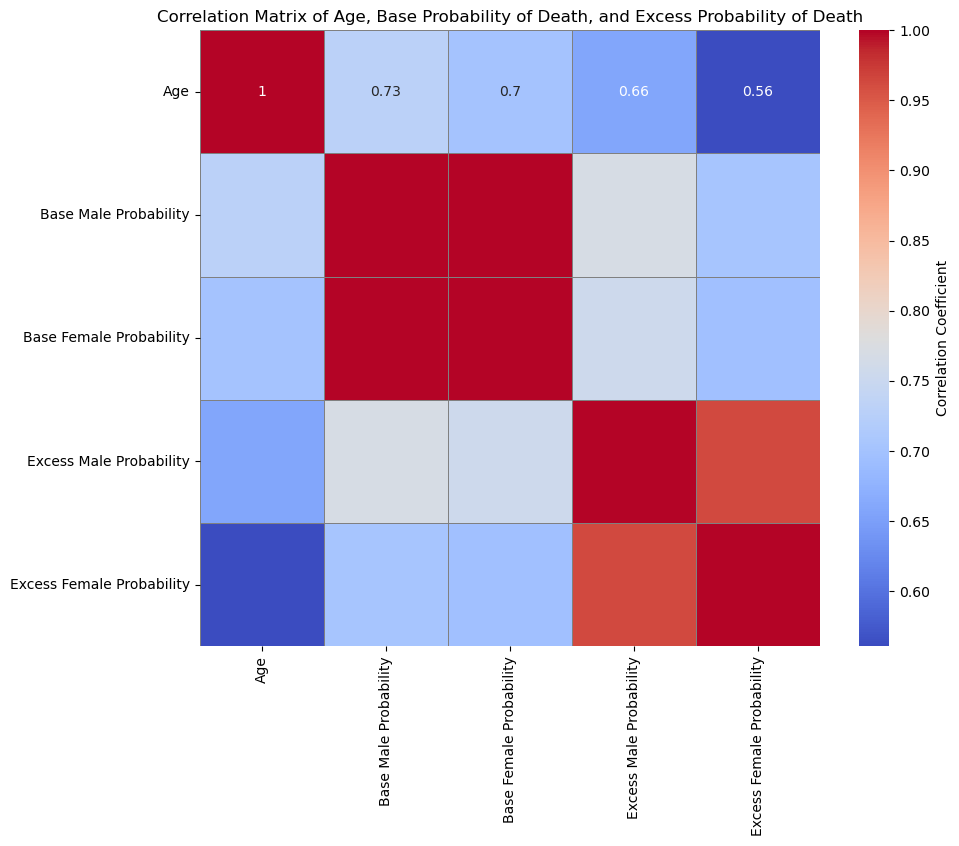

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Covid_analysis.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)

# Selecting relevant columns for correlation analysis
df_correlation = df[['Age', 'base_male', 'base_female', 'excess_male_prob', 'excess_female_prob']]

# Rename columns for better readability
df_correlation = df_correlation.rename(columns={
    'base_male': 'Base Male Probability',
    'base_female': 'Base Female Probability',
    'excess_male_prob': 'Excess Male Probability',
    'excess_female_prob': 'Excess Female Probability'
})

# Calculate the correlation matrix
correlation_matrix = df_correlation.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, linecolor='gray', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Age, Base Probability of Death, and Excess Probability of Death')
plt.show()